##### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv("../data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


This dataset contains demopgraphic and academic information of students including this exam scores

In [6]:
print(df.shape)
df.info()

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From this we can say that the data ranges from 0-100.<br>
Mean scores are roughly from 60s to 70s

In [8]:
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Created an overall performance metric for better comparison.

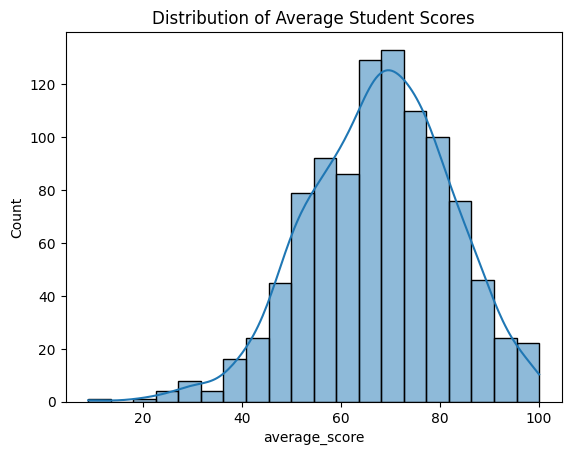

In [10]:
plt.figure()
sns.histplot(df["average_score"], bins=20 , kde=True)
plt.title("Distribution of Average Student Scores")
plt.show()

Most students score between 60 and 80, indicating average to good performance.

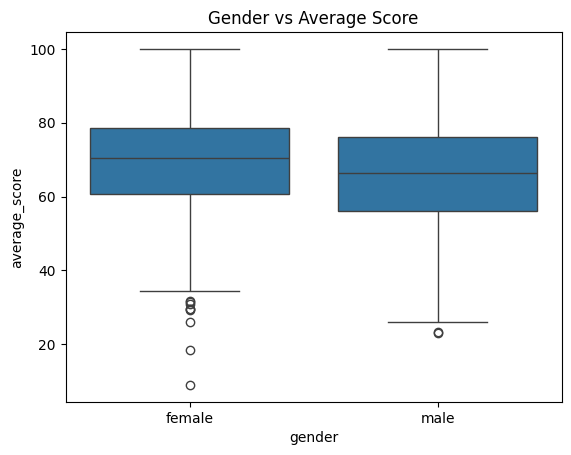

In [11]:
plt.figure()
sns.boxplot(x='gender',y='average_score',data=df)
plt.title("Gender vs Average Score")
plt.show()

Female students have slightly higher median average_score than Male students

In [14]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

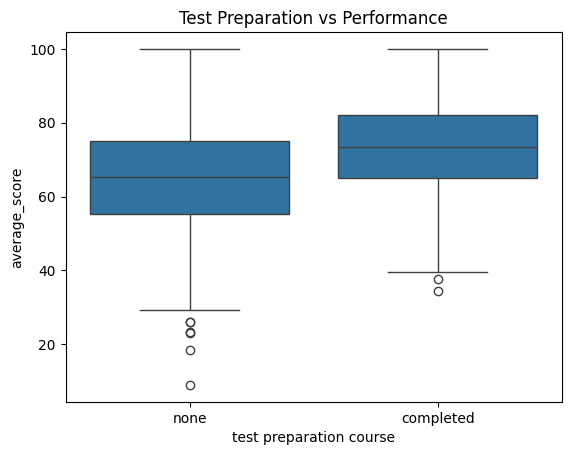

In [12]:
plt.figure()
sns.boxplot(x='test preparation course',y='average_score',data=df)
plt.title("Test Preparation vs Performance")
plt.show()

Students who completed test preparation courses scored higher

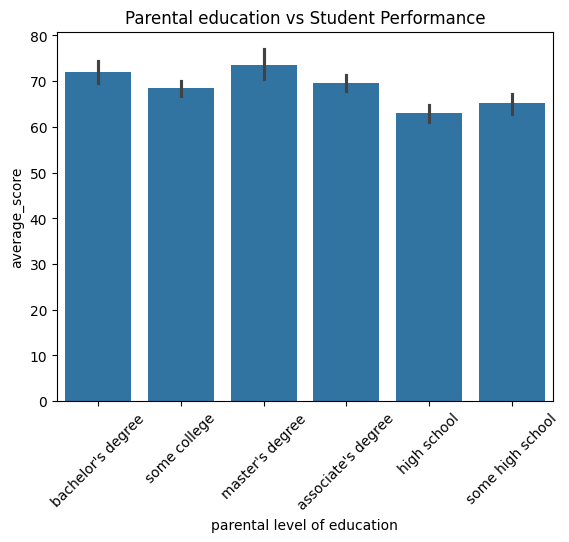

In [15]:
plt.figure()
sns.barplot(
    x='parental level of education',
    y='average_score',
    data=df
)
plt.xticks(rotation=45)
plt.title("Parental education vs Student Performance")
plt.show()

Higher parental education levels tend to correlate with improved student performance

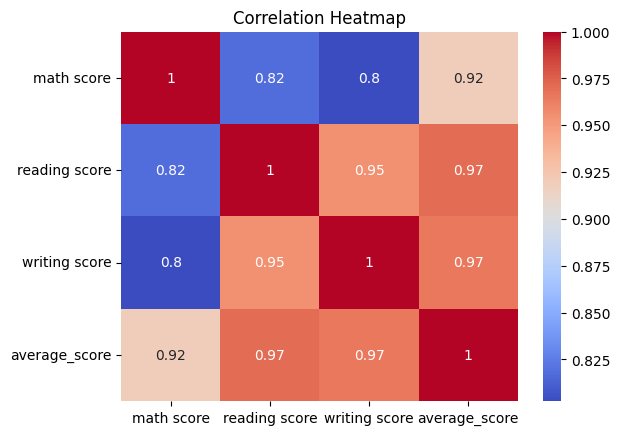

In [16]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Strong correlation exists between reading and writing scores.

## Key Insights

- Test preparation courses have a strong positive impact on performance
- Reading and writing scores are highly correlated
- Attendance and structured study improve results
- Parental education level influences student outcomes
